<a href="https://colab.research.google.com/github/Riazifar-M/project-6220/blob/main/M.RIAZIFAR_Project_Classification_with_PyCaret_%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [5]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [9]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Riazifar-M/project-6220/main/Liver%20Cancer%205.0.csv')
df.head(25)

ALT       AST       ALP      TB      INR      SA  class
0   0.09092  0.065920  0.027490  0.1675  0.06043  0.2636      0
1   0.07698  0.047510  0.033840  0.1809  0.05718  0.2338      0
2   0.04966  0.016570  0.011150  0.1495  0.05888  0.4062      0
3   0.06059  0.018570  0.017230  0.1353  0.05953  0.1872      0
4   0.04751  0.019720  0.013490  0.1868  0.06110  0.2273      0
5   0.14850  0.177200  0.106000  0.2092  0.06310  0.8337      1
6   0.07081  0.052530  0.033340  0.1616  0.05684  0.3105      1
7   0.05473  0.030360  0.022780  0.1920  0.05907  0.3249      0
8   0.12670  0.132300  0.089940  0.1917  0.05961  0.7275      1
9   0.13650  0.129300  0.081230  0.2027  0.06758  0.4226      1
10  0.03789  0.000692  0.004167  0.1819  0.05501  0.4040      0
11  0.05272  0.020610  0.007799  0.1683  0.07187  0.1559      0
12  0.08061  0.010840  0.012900  0.2743  0.06960  0.5158      0
13  0.08963  0.030000  0.009259  0.1828  0.06757  0.3582      0
14  0.20080  0.213500  0.086530  0.1949  0.07292  0.7036      1
15  0.08751  0.059880  0.021800  0.2341  0.06963  0.4098      0
16  0.12620  0.112800  0.068730  0.1905  0.06590  0.4255      1
17  0.14790  0.126700  0.090290  0.1953  0.06654  0.3577      1
18  0.07773  0.021720  0.015040  0.1717  0.06899  0.2351      0
19  0.04701  0.037090  0.022300  0.1516  0.05667  0.2727      0
20  0.14130  0.313000  0.043750  0.2111  0.08046  0.3274      0
21  0.05234  0.036530  0.028640  0.1590  0.05653  0.2368      0
22  0.10290  0.108000  0.079510  0.1582  0.05461  0.7888      1
23  0.15310  0.086060  0.028720  0.1902  0.08980  0.5262      0
24  0.18300  0.169200  0.079440  0.1927  0.06487  0.5907      1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALT     250 non-null    float64
 1   AST     250 non-null    float64
 2   ALP     250 non-null    float64
 3   TB      250 non-null    float64
 4   INR     250 non-null    float64
 5   SA      250 non-null    float64
 6   class   250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB


In [11]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [12]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

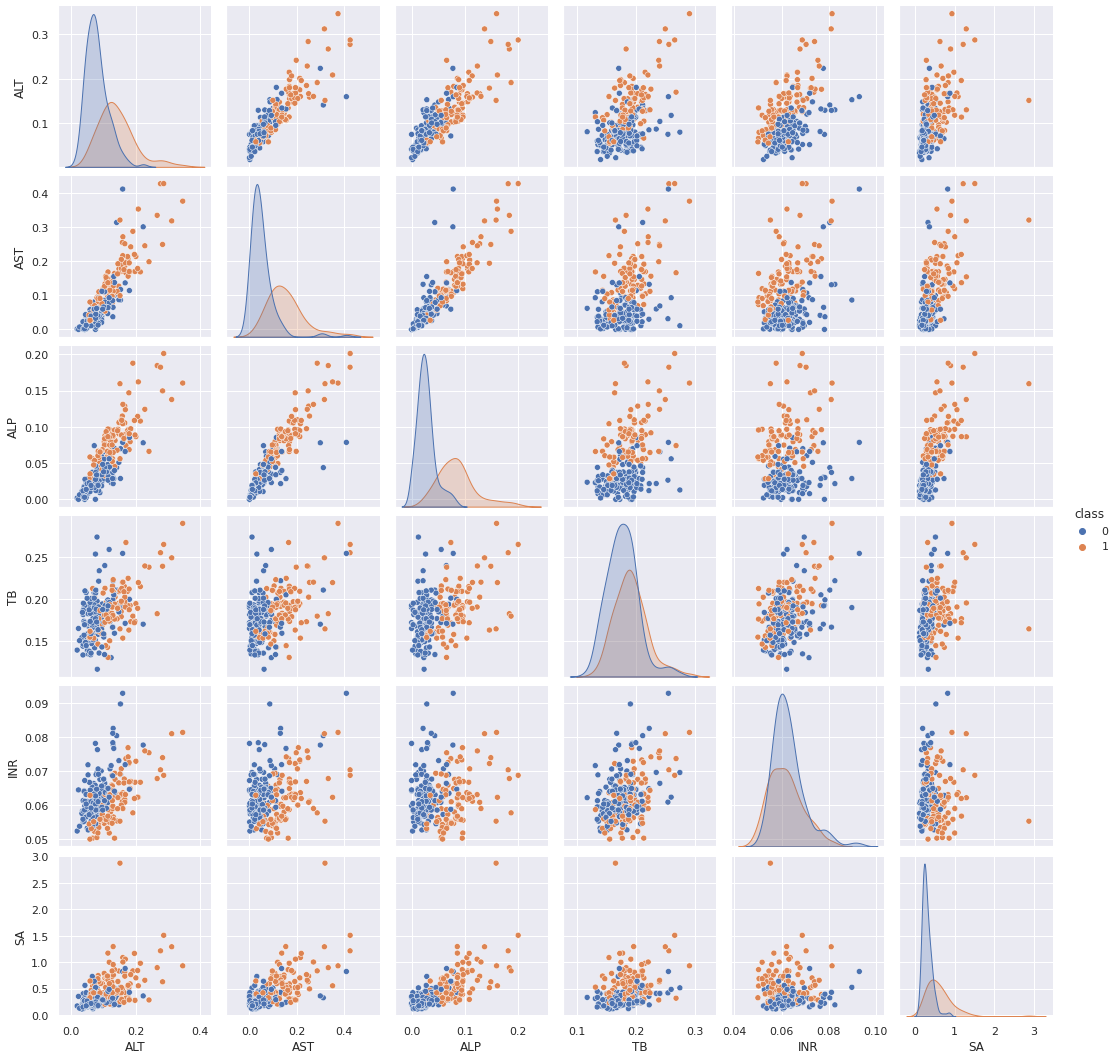

In [13]:
sns.pairplot(df, hue='class')
plt.show()

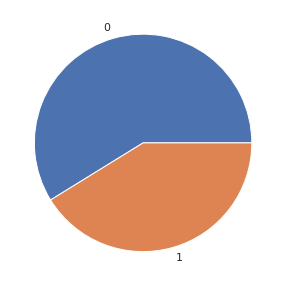

In [14]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [15]:
X = df.drop(columns=['class'])
X.head(10)

ALT      AST      ALP      TB      INR      SA
0  0.09092  0.06592  0.02749  0.1675  0.06043  0.2636
1  0.07698  0.04751  0.03384  0.1809  0.05718  0.2338
2  0.04966  0.01657  0.01115  0.1495  0.05888  0.4062
3  0.06059  0.01857  0.01723  0.1353  0.05953  0.1872
4  0.04751  0.01972  0.01349  0.1868  0.06110  0.2273
5  0.14850  0.17720  0.10600  0.2092  0.06310  0.8337
6  0.07081  0.05253  0.03334  0.1616  0.05684  0.3105
7  0.05473  0.03036  0.02278  0.1920  0.05907  0.3249
8  0.12670  0.13230  0.08994  0.1917  0.05961  0.7275
9  0.13650  0.12930  0.08123  0.2027  0.06758  0.4226

In [16]:
X.describe().transpose()

count      mean       std      min       25%       50%       75%      max
ALT  250.0  0.104789  0.053709  0.01938  0.066805  0.094535  0.130450  0.34540
AST  250.0  0.092963  0.083527  0.00000  0.031672  0.065925  0.132250  0.42680
ALP  250.0  0.050685  0.039161  0.00000  0.021747  0.037135  0.074868  0.20120
TB   250.0  0.182366  0.028129  0.11670  0.162425  0.181350  0.195850  0.29060
INR  250.0  0.062441  0.007010  0.04996  0.057458  0.061210  0.065537  0.09296
SA   250.0  0.424584  0.290619  0.11530  0.240925  0.334000  0.518200  2.87300

**Standardize the Data**

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

ALT       AST       ALP        TB       INR        SA
0 -0.258749 -0.324416 -0.593486 -0.529545 -0.287428 -0.555046
1 -0.518815 -0.545265 -0.431010 -0.052221 -0.751982 -0.657792
2 -1.028500 -0.916425 -1.011574 -1.170728 -0.508985 -0.063385
3 -0.824589 -0.892433 -0.856007 -1.676550 -0.416074 -0.818461
4 -1.068611 -0.878638 -0.951701  0.157945 -0.191659 -0.680203
5  0.815470  1.010513  1.415332  0.955861  0.094220  1.410564
6 -0.633923 -0.485044 -0.443804 -0.739711 -0.800581 -0.393343
7 -0.933914 -0.750999 -0.714000  0.343175 -0.481826 -0.343694
8  0.408767  0.471887  1.004409  0.332489 -0.404639  1.044404
9  0.591596  0.435898  0.781548  0.724322  0.734589 -0.006841

In [18]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
ALT  250.0 -9.947598e-17  1.002006 -1.593407 -0.708641 -0.191307  0.478727   
AST  250.0 -1.243450e-16  1.002006 -1.115201 -0.735254 -0.324356  0.471287   
ALP  250.0  8.881784e-18  1.002006 -1.296867 -0.740418 -0.346702  0.618752   
TB   250.0  9.876544e-16  1.002006 -2.339105 -0.710323 -0.036191  0.480317   
INR  250.0 -6.679102e-16  1.002006 -1.784005 -0.712316 -0.175936  0.442635   
SA   250.0 -2.557954e-16  1.002006 -1.066360 -0.633226 -0.312319  0.322772   

          max  
ALT  4.488858  
AST  4.004747  
ALP  3.851194  
TB   3.855430  
INR  4.362392  
SA   8.441733

**Observations and variables**

In [19]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

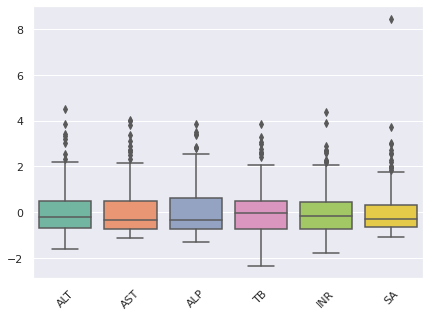

In [20]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

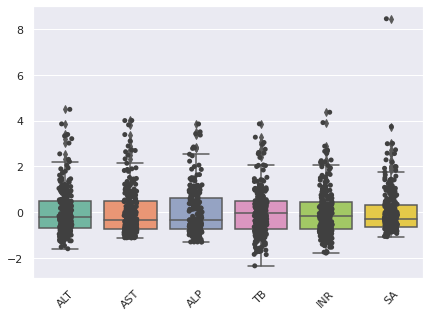

In [21]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

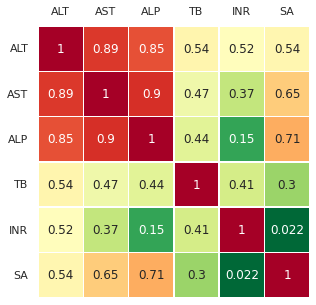

In [22]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

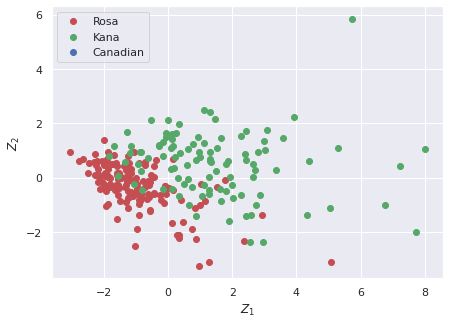

In [23]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

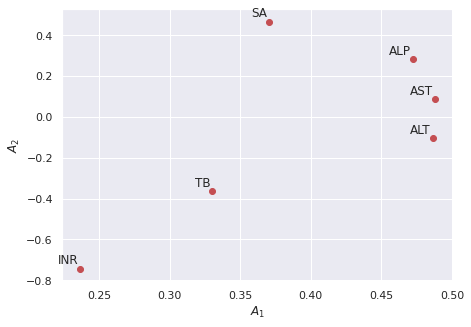

In [24]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


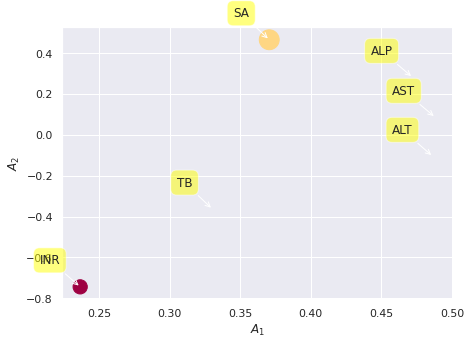

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

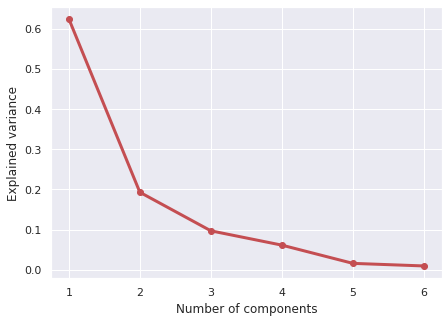

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

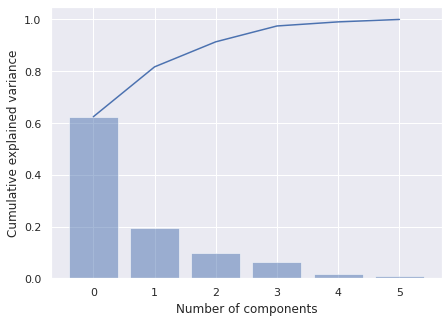

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

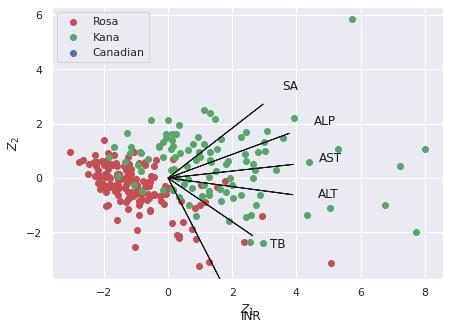

In [28]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [29]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=874e836dbb1d7577444531ce7792876d67fb6223904cde5e9627574ebcf4043d
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=8713a3fc85eed5bbf16d9591dc5df5481c1d75430d80ae68ecef665bd34cd57c
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [30]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [31]:
out['PC']

PC1       PC2       PC3       PC4
0   -1.012862 -0.019541 -0.243677 -0.211433
1   -1.160767  0.158988  0.428304 -0.439847
2   -1.955613  0.519884 -0.362309  0.564355
3   -2.196037  0.307455 -0.965469 -0.081525
4   -1.643239 -0.461916  0.608757  0.135901
..        ...       ...       ...       ...
245 -1.559158 -0.026560  0.773566 -0.285035
246 -1.616739 -0.265526 -0.245498 -0.166644
247 -1.896435  0.095467 -0.182892 -0.055568
248 -2.272530  0.075537 -0.642478  0.025301
249 -0.933761  0.482896 -0.221675  1.161677

[250 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f101433d8e0>)

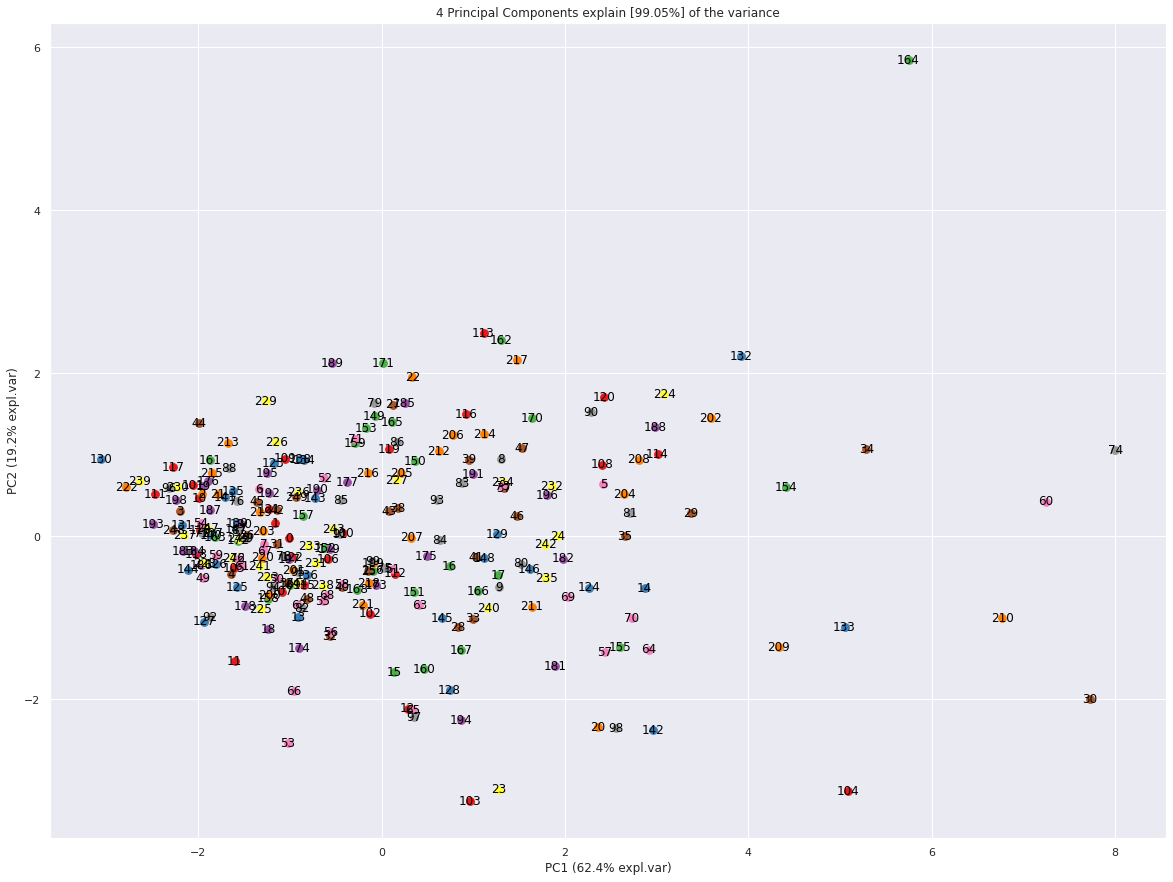

In [32]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [33]:
A = out['loadings'].T

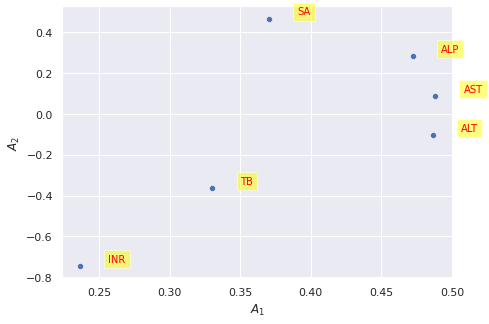

In [34]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

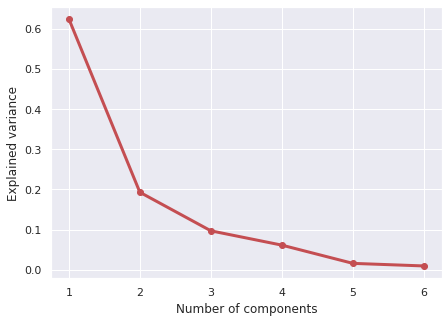

In [35]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

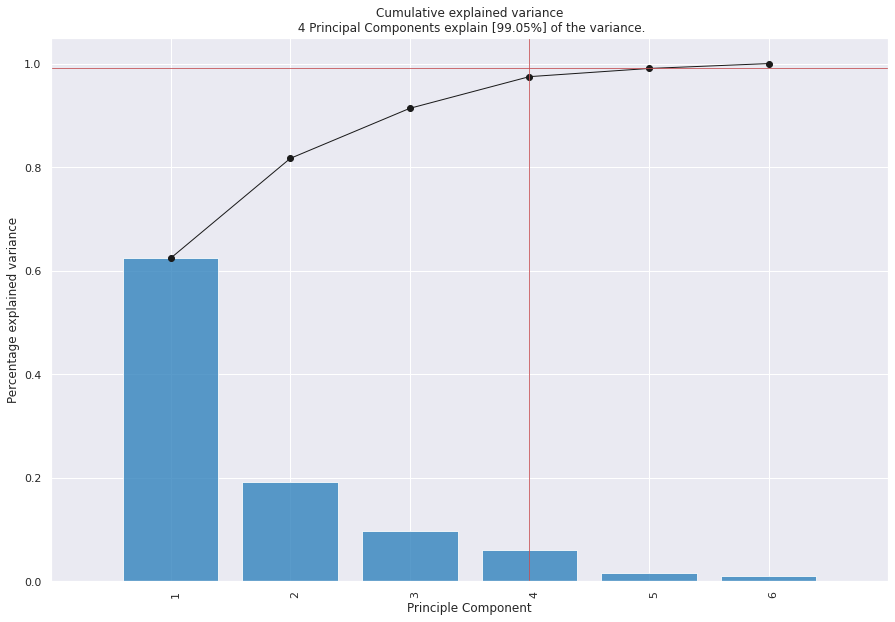

<Figure size 504x360 with 0 Axes>

In [36]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].


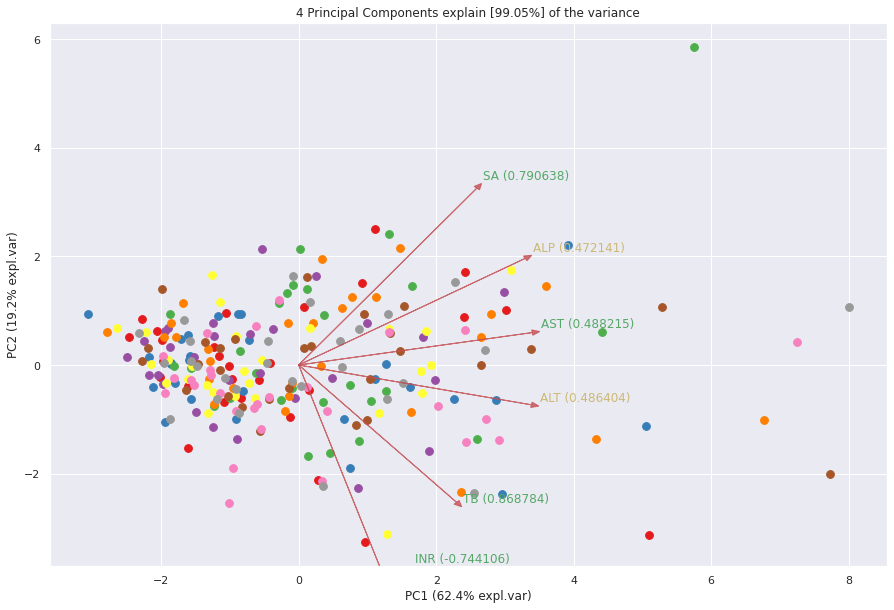

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f10165af220>)

In [37]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [250] unique colors! Available unique colors: [9].


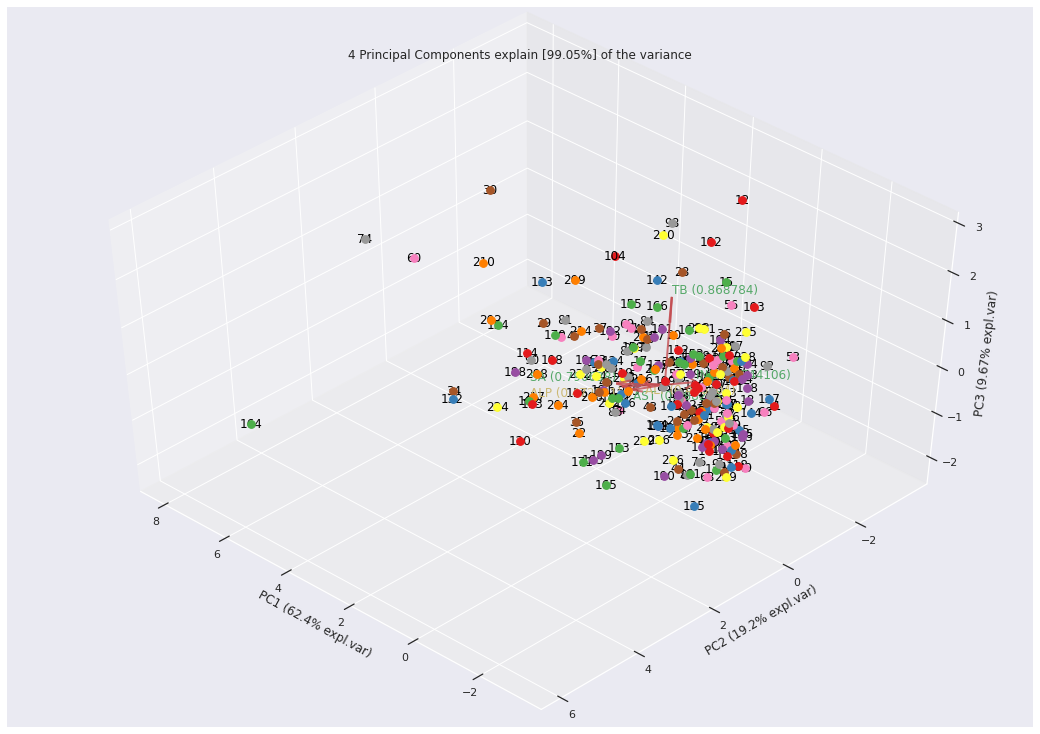

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f1019030100>)

In [38]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [40]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (225, 7)
Unseen Data For Predictions: (25, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [42]:

from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (225, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (157, 6)
12                    Transformed Test Set           (68, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4613
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [43]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8975  0.9631  0.8833  0.8679   
nb                            Naive Bayes    0.8913  0.9331  0.8000  0.9274   
rf               Random Forest Classifier    0.8908  0.9522  0.8667  0.8679   
lightgbm  Light Gradient Boosting Machine    0.8850  0.9387  0.8667  0.8560   
gbc          Gradient Boosting Classifier    0.8788  0.9278  0.8667  0.8431   
lda          Linear Discriminant Analysis    0.8788  0.9556  0.7833  0.9107   
qda       Quadratic Discriminant Analysis    0.8717  0.9361  0.8333  0.8502   
dt               Decision Tree Classifier    0.8529  0.8428  0.8000  0.8294   
knn                K Neighbors Classifier    0.8462  0.8947  0.7833  0.8221   
svm                   SVM - Linear Kernel    0.8400  0.0000  0.8167  0.8307   
ada                  Ada Boost Classifier    0.8217  0.9112  0.7357  0.8086   
ridge                    Ridge Classifier    0.7754  0.0000  0.5071  0.8740   
lr                    Logistic Regression    0.7562  0.8883  0.4405  0.8667   
dummy                    Dummy Classifier    0.6112  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.8682  0.7847  0.7932     0.131  
nb        0.8423  0.7622  0.7823     0.010  
rf        0.8573  0.7696  0.7804     0.202  
lightgbm  0.8484  0.7568  0.7691     0.095  
gbc       0.8444  0.7458  0.7583     0.058  
lda       0.8232  0.7347  0.7560     0.010  
qda       0.8313  0.7287  0.7399     0.009  
dt        0.8020  0.6862  0.7006     0.009  
knn       0.7922  0.6710  0.6820     0.014  
svm       0.7978  0.6695  0.6975     0.008  
ada       0.7547  0.6161  0.6319     0.068  
ridge     0.6200  0.4841  0.5325     0.010  
lr        0.5697  0.4324  0.4848     0.247  
dummy     0.0000  0.0000  0.0000     0.008

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [44]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [45]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9167  0.8333  1.0000  0.9091  0.8621  0.8704
1       0.8125  0.7833  0.6667  0.8000  0.7273  0.5862  0.5919
2       0.8125  0.7833  0.6667  0.8000  0.7273  0.5862  0.5919
3       0.8750  0.8667  0.8333  0.8333  0.8333  0.7333  0.7333
4       0.8750  0.9000  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.8750  0.9000  1.0000  0.7500  0.8571  0.7500  0.7746
6       0.8750  0.8889  1.0000  0.7778  0.8750  0.7538  0.7778
7       0.8667  0.8611  0.8333  0.8333  0.8333  0.7222  0.7222
8       0.8667  0.8333  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.7333  0.6944  0.5000  0.7500  0.6000  0.4118  0.4308
Mean    0.8529  0.8428  0.8000  0.8294  0.8020  0.6862  0.7006
SD      0.0520  0.0665  0.1633  0.0903  0.0876  0.1195  0.1205

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [46]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [47]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  1.0000  1.0000  0.7500  0.8571  0.7500  0.7746
1       0.8750  0.8167  0.6667  1.0000  0.8000  0.7143  0.7454
2       0.9375  0.9917  1.0000  0.8571  0.9231  0.8710  0.8783
3       0.8125  0.8333  0.6667  0.8000  0.7273  0.5862  0.5919
4       0.9375  0.9500  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.8750  0.8833  1.0000  0.7500  0.8571  0.7500  0.7746
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.8519  0.8333  0.8333  0.8333  0.7222  0.7222
8       0.9333  0.9815  0.8333  1.0000  0.9091  0.8571  0.8660
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.8979  0.9197  0.8833  0.8681  0.8663  0.7844  0.7954
SD      0.0506  0.0691  0.1302  0.0935  0.0723  0.1100  0.1078

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [48]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [49]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [50]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [51]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6875  0.8417  0.5000  0.6000  0.5455  0.3103  0.3133
1       0.8750  0.9333  0.8333  0.8333  0.8333  0.7333  0.7333
2       0.8750  0.8583  0.6667  1.0000  0.8000  0.7143  0.7454
3       0.8125  0.8833  0.6667  0.8000  0.7273  0.5862  0.5919
4       0.8750  0.9333  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9417  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.7333  0.8148  0.6667  0.6667  0.6667  0.4444  0.4444
8       0.8667  0.8889  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8519  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8462  0.8947  0.7833  0.8221  0.7922  0.6710  0.6820
SD      0.0872  0.0537  0.1675  0.1368  0.1215  0.1886  0.1911

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [53]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9000  0.5000  0.7500  0.6000  0.4286  0.4472
1       0.8125  0.8750  0.6667  0.8000  0.7273  0.5862  0.5919
2       0.8750  0.8167  0.6667  1.0000  0.8000  0.7143  0.7454
3       0.8750  0.9500  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.9375  1.0000  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9000  1.0000  0.8571  0.9231  0.8710  0.8783
6       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
7       0.8000  0.8241  0.8333  0.7143  0.7692  0.5946  0.6001
8       0.8667  0.9074  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8519  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8592  0.9025  0.7690  0.8693  0.8035  0.6951  0.7103
SD      0.0633  0.0618  0.1540  0.1165  0.0962  0.1403  0.1398

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [54]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [55]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.8333  0.5000  0.7500  0.6000  0.4286  0.4472
1       0.7500  0.8167  0.3333  1.0000  0.5000  0.3846  0.4880
2       0.8125  0.9167  0.5000  1.0000  0.6667  0.5556  0.6202
3       0.7500  0.9167  0.3333  1.0000  0.5000  0.3846  0.4880
4       0.9375  1.0000  0.8333  1.0000  0.9091  0.8621  0.8704
5       0.7500  0.9000  0.5000  0.7500  0.6000  0.4286  0.4472
6       0.8125  1.0000  0.5714  1.0000  0.7273  0.6000  0.6547
7       0.6000  0.7963  0.1667  0.5000  0.2500  0.0625  0.0801
8       0.7333  0.9074  0.3333  1.0000  0.5000  0.3750  0.4804
9       0.6667  0.7963  0.3333  0.6667  0.4444  0.2424  0.2722
Mean    0.7562  0.8883  0.4405  0.8667  0.5697  0.4324  0.4848
SD      0.0850  0.0722  0.1741  0.1756  0.1684  0.2022  0.2019

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [56]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9167  0.5000  0.7500  0.6000  0.4286  0.4472
1       0.8125  0.8833  0.6667  0.8000  0.7273  0.5862  0.5919
2       0.8750  0.9333  0.6667  1.0000  0.8000  0.7143  0.7454
3       0.8750  0.9667  0.6667  1.0000  0.8000  0.7143  0.7454
4       0.8750  1.0000  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9000  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.7333  0.8148  0.8333  0.6250  0.7143  0.4737  0.4910
8       0.8667  0.9259  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8704  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8525  0.9211  0.7833  0.8496  0.7991  0.6838  0.7012
SD      0.0773  0.0552  0.1675  0.1348  0.1058  0.1639  0.1619

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [57]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [58]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  1.0000  0.8571  0.9231  0.8710  0.8783
1       0.8750  0.9750  0.6667  1.0000  0.8000  0.7143  0.7454
2       0.8750  0.9417  0.8333  0.8333  0.8333  0.7333  0.7333
3       0.8750  0.9667  0.8333  0.8333  0.8333  0.7333  0.7333
4       0.9375  0.9333  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.8750  0.9833  1.0000  0.7500  0.8571  0.7500  0.7746
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.8889  0.8333  0.7143  0.7692  0.5946  0.6001
8       0.8667  0.9444  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.8908  0.9522  0.8667  0.8679  0.8573  0.7696  0.7804
SD      0.0517  0.0385  0.1247  0.0968  0.0671  0.1080  0.1052

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [59]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8750  0.9833  0.6667  1.0000  0.8000  0.7143  0.7454
2       0.8750  0.9500  0.8333  0.8333  0.8333  0.7333  0.7333
3       0.8750  0.9833  0.8333  0.8333  0.8333  0.7333  0.7333
4       0.8125  0.9167  1.0000  0.6667  0.8000  0.6364  0.6831
5       0.8750  0.9333  1.0000  0.7500  0.8571  0.7500  0.7746
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9074  0.8333  0.8333  0.8333  0.7222  0.7222
8       0.9333  0.9259  0.8333  1.0000  0.9091  0.8571  0.8660
9       0.8667  0.9259  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.8979  0.9526  0.8833  0.8750  0.8700  0.7869  0.7980
SD      0.0578  0.0339  0.1067  0.1133  0.0712  0.1180  0.1107

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [60]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9667  1.0000  0.8571  0.9231  0.8710  0.8783
1       0.9375  0.9667  0.8333  1.0000  0.9091  0.8621  0.8704
2       0.8750  0.9333  0.8333  0.8333  0.8333  0.7333  0.7333
3       0.8750  0.9667  0.8333  0.8333  0.8333  0.7333  0.7333
4       0.8750  0.9500  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.8750  0.9500  1.0000  0.7500  0.8571  0.7500  0.7746
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8000  0.9074  0.8333  0.7143  0.7692  0.5946  0.6001
8       0.8667  0.9630  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.9333  0.9444  1.0000  0.8571  0.9231  0.8649  0.8729
Mean    0.8975  0.9548  0.9000  0.8595  0.8705  0.7865  0.7976
SD      0.0524  0.0232  0.1106  0.1028  0.0649  0.1078  0.1050

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [62]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [63]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [64]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (225, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (157, 3)
12                    Transformed Test Set           (68, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              98d2
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [65]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9108  0.9606  0.8667  0.9115   
qda       Quadratic Discriminant Analysis    0.8979  0.9357  0.8000  0.9314   
lr                    Logistic Regression    0.8913  0.9494  0.8000  0.9181   
et                 Extra Trees Classifier    0.8913  0.9415  0.8333  0.8979   
rf               Random Forest Classifier    0.8667  0.9293  0.8000  0.8613   
lightgbm  Light Gradient Boosting Machine    0.8596  0.9369  0.7833  0.8565   
ada                  Ada Boost Classifier    0.8592  0.9356  0.8024  0.8677   
gbc          Gradient Boosting Classifier    0.8592  0.9306  0.8190  0.8360   
nb                            Naive Bayes    0.8583  0.9370  0.7000  0.9264   
ridge                    Ridge Classifier    0.8525  0.0000  0.6833  0.9131   
lda          Linear Discriminant Analysis    0.8525  0.9457  0.6833  0.9131   
svm                   SVM - Linear Kernel    0.8329  0.0000  0.7833  0.8211   
dt               Decision Tree Classifier    0.8146  0.8078  0.7833  0.7714   
dummy                    Dummy Classifier    0.6112  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8801  0.8096  0.8199     0.015  
qda       0.8495  0.7746  0.7894     0.009  
lr        0.8416  0.7610  0.7767     0.011  
et        0.8509  0.7663  0.7817     0.150  
rf        0.8049  0.7076  0.7275     0.167  
lightgbm  0.8023  0.6952  0.7114     0.018  
ada       0.8151  0.7031  0.7225     0.068  
gbc       0.8191  0.7042  0.7135     0.055  
nb        0.7716  0.6794  0.7110     0.009  
ridge     0.7624  0.6650  0.6939     0.017  
lda       0.7624  0.6650  0.6939     0.009  
svm       0.7703  0.6436  0.6698     0.014  
dt        0.7555  0.6084  0.6251     0.010  
dummy     0.0000  0.0000  0.0000     0.007

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [66]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [67]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9500  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.9375  0.9667  0.8333  1.0000  0.9091  0.8621  0.8704
2       0.9375  0.9667  0.8333  1.0000  0.9091  0.8621  0.8704
3       0.9375  1.0000  0.8333  1.0000  0.9091  0.8621  0.8704
4       0.9375  0.9250  1.0000  0.8571  0.9231  0.8710  0.8783
5       0.9375  0.9083  1.0000  0.8571  0.9231  0.8710  0.8783
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  1.0000  0.8333  1.0000  0.9091  0.8571  0.8660
8       0.8667  0.9444  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8667  0.8889  0.8333  0.8333  0.8333  0.7222  0.7222
Mean    0.9167  0.9550  0.8500  0.9348  0.8843  0.8200  0.8286
SD      0.0502  0.0373  0.1167  0.0813  0.0729  0.1102  0.1079

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [68]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [69]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [70]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [72]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 2.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [73]:
import shap

In [74]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9500  0.5000  0.7500  0.6000  0.4286  0.4472
1       0.8750  0.9167  0.8333  0.8333  0.8333  0.7333  0.7333
2       0.8750  0.8417  0.8333  0.8333  0.8333  0.7333  0.7333
3       0.7500  1.0000  0.3333  1.0000  0.5000  0.3846  0.4880
4       0.8750  0.8750  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.9375  0.9500  1.0000  0.8571  0.9231  0.8710  0.8783
6       0.9375  1.0000  1.0000  0.8750  0.9333  0.8750  0.8819
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8667  0.9259  0.6667  1.0000  0.8000  0.7059  0.7385
9       0.8000  0.8333  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8667  0.9293  0.8000  0.8613  0.8049  0.7076  0.7275
SD      0.0773  0.0599  0.2211  0.1029  0.1446  0.1839  0.1660

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [75]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9667  0.6667  0.8000  0.7273  0.5862  0.5919
1       0.8750  0.9667  0.8333  0.8333  0.8333  0.7333  0.7333
2       0.8125  0.8167  0.8333  0.7143  0.7692  0.6129  0.6181
3       0.9375  0.9833  0.8333  1.0000  0.9091  0.8621  0.8704
4       0.8750  0.9000  1.0000  0.7500  0.8571  0.7500  0.7746
5       0.8750  0.9667  1.0000  0.7500  0.8571  0.7500  0.7746
6       0.9375  1.0000  1.0000  0.8750  0.9333  0.8750  0.8819
7       0.9333  1.0000  1.0000  0.8571  0.9231  0.8649  0.8729
8       0.9333  0.9074  0.8333  1.0000  0.9091  0.8571  0.8660
9       0.8000  0.8148  0.8333  0.7143  0.7692  0.5946  0.6001
Mean    0.8792  0.9322  0.8833  0.8294  0.8488  0.7486  0.7584
SD      0.0528  0.0664  0.1067  0.1005  0.0691  0.1109  0.1123

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


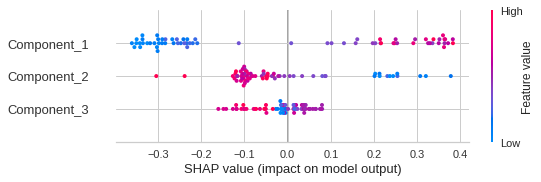

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [76]:
interpret_model(tuned_rf_pca, plot='summary')

In [77]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [78]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [79]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
